In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from astropy.coordinates import Angle
from astropy.time import Time
import astropy.units as u

import datetime

[Project Pluto pseudo-MPEC](https://www.projectpluto.com/pluto/mpecs/tianwea.htm) from 2020 Jul 26 16:07:27 UT.

In [2]:
pseudo_MPEC = """2020 07 24 00  00 42 55.456   +15 18 58.20   295982 1.0164 105.2 15.5 .160 126
2020 07 24 01  00 43 33.770   +15 23 21.38   309695 1.0164 105.0 15.6 .155 126
2020 07 24 02  00 44 08.854   +15 27 21.78   323357 1.0164 104.9 15.7 .150 126
2020 07 24 03  00 44 41.107   +15 31 02.29   336971 1.0164 104.8 15.8 .145 125
2020 07 24 04  00 45 10.866   +15 34 25.31   350542 1.0165 104.7 15.9 .141 125
2020 07 24 05  00 45 38.413   +15 37 32.87   364073 1.0165 104.6 16.0 .137 125
2020 07 24 06  00 46 03.992   +15 40 26.69   377566 1.0165 104.6 16.1 .133 125
2020 07 24 07  00 46 27.809   +15 43 08.25   391025 1.0165 104.5 16.1 .129 125
2020 07 24 08  00 46 50.043   +15 45 38.81   404451 1.0165 104.4 16.2 .126 125
2020 07 24 09  00 47 10.848   +15 47 59.46   417847 1.0165 104.4 16.3 .123 125
2020 07 24 10  00 47 30.361   +15 50 11.16   431215 1.0165 104.3 16.4 .119 125
2020 07 24 11  00 47 48.699   +15 52 14.74   444555 1.0166 104.3 16.4 .116 125
2020 07 24 12  00 48 05.967   +15 54 10.93   457871 1.0166 104.3 16.5 .113 126
2020 07 24 13  00 48 22.256   +15 56 00.38   471163 1.0166 104.2 16.6 .111 126
2020 07 24 14  00 48 37.649   +15 57 43.65   484432 1.0166 104.2 16.6 .108 126
2020 07 24 15  00 48 52.217   +15 59 21.26   497680 1.0166 104.2 16.7 .105 126
2020 07 24 16  00 49 06.026   +16 00 53.65   510908 1.0166 104.1 16.7 .103 127
2020 07 24 17  00 49 19.135   +16 02 21.24   524117 1.0167 104.1 16.8 .100 127
2020 07 24 18  00 49 31.595   +16 03 44.39   537308 1.0167 104.1 16.8 .098 128
2020 07 24 19  00 49 43.453   +16 05 03.42   550481 1.0167 104.1 16.9 .096 128
2020 07 24 20  00 49 54.753   +16 06 18.62   563638 1.0167 104.1 16.9 .094 129
2020 07 24 21  00 50 05.533   +16 07 30.28   576779 1.0167 104.1 17.0 .091 129
2020 07 24 22  00 50 15.828   +16 08 38.62   589905 1.0167 104.1 17.0 .089 130
2020 07 24 23  00 50 25.670   +16 09 43.88   603017 1.0168 104.1 17.1 .088 130
2020 07 25 00  00 50 35.088   +16 10 46.25   616115 1.0168 104.1 17.1 .086 131
2020 07 25 01  00 50 44.110   +16 11 45.92   629200 1.0168 104.1 17.2 .084 132
2020 07 25 02  00 50 52.759   +16 12 43.05   642272 1.0168 104.1 17.2 .082 132
2020 07 25 03  00 51 01.059   +16 13 37.81   655332 1.0168 104.1 17.3 .080 133
2020 07 25 04  00 51 09.029   +16 14 30.32   668380 1.0169 104.1 17.3 .079 134
2020 07 25 05  00 51 16.689   +16 15 20.74   681417 1.0169 104.1 17.4 .077 135
2020 07 25 06  00 51 24.057   +16 16 09.16   694443 1.0169 104.1 17.4 .076 135
2020 07 25 07  00 51 31.149   +16 16 55.72   707459 1.0169 104.1 17.4 .074 136
2020 07 25 08  00 51 37.979   +16 17 40.50   720465 1.0169 104.1 17.5 .073 137
2020 07 25 09  00 51 44.563   +16 18 23.61   733462 1.0169 104.1 17.5 .072 138
2020 07 25 10  00 51 50.913   +16 19 05.13   746448 1.0170 104.1 17.6 .070 139
2020 07 25 11  00 51 57.040   +16 19 45.16   759426 1.0170 104.1 17.6 .069 140
2020 07 25 12  00 52 02.958   +16 20 23.76   772396 1.0170 104.2 17.6 .068 140
2020 07 25 13  00 52 08.675   +16 21 01.00   785356 1.0170 104.2 17.7 .067 141
2020 07 25 14  00 52 14.202   +16 21 36.96   798309 1.0170 104.2 17.7 .066 142
2020 07 25 15  00 52 19.548   +16 22 11.69   811254 1.0171 104.2 17.7 .065 143
2020 07 25 16  00 52 24.721   +16 22 45.26   824191 1.0171 104.2 17.8 .064 144
2020 07 25 17  00 52 29.731   +16 23 17.72   837120 1.0171 104.2 17.8 .063 145
2020 07 25 18  00 52 34.583   +16 23 49.12   850043 1.0171 104.2 17.8 .062 146
2020 07 25 19  00 52 39.285   +16 24 19.51   862958 1.0171 104.3 17.9 .061 147
2020 07 25 20  00 52 43.845   +16 24 48.94   875867 1.0171 104.3 17.9 .060 148
2020 07 25 21  00 52 48.268   +16 25 17.44   888769 1.0172 104.3 17.9 .060 149
2020 07 25 22  00 52 52.559   +16 25 45.06   901665 1.0172 104.3 18.0 .059 150
2020 07 25 23  00 52 56.726   +16 26 11.83   914555 1.0172 104.3 18.0 .058 151
2020 07 26 00  00 53 00.773   +16 26 37.80   927438 1.0172 104.4 18.0 .057 152
2020 07 26 01  00 53 04.704   +16 27 02.99   940316 1.0172 104.4 18.0 .057 153
2020 07 26 02  00 53 08.525   +16 27 27.44   953188 1.0173 104.4 18.1 .056 154
2020 07 26 03  00 53 12.240   +16 27 51.17   966054 1.0173 104.4 18.1 .056 155
2020 07 26 04  00 53 15.854   +16 28 14.22   978915 1.0173 104.5 18.1 .055 156
2020 07 26 05  00 53 19.369   +16 28 36.62   991771 1.0173 104.5 18.2 .055 158
2020 07 26 06  00 53 22.791   +16 28 58.37   .00672 1.0173 104.5 18.2 .054 159
2020 07 26 07  00 53 26.122   +16 29 19.53   .00680 1.0174 104.5 18.2 .054 160
2020 07 26 08  00 53 29.367   +16 29 40.09   .00689 1.0174 104.6 18.2 .053 161
2020 07 26 09  00 53 32.527   +16 30 00.10   .00697 1.0174 104.6 18.3 .053 162
2020 07 26 10  00 53 35.607   +16 30 19.56   .00706 1.0174 104.6 18.3 .053 163
2020 07 26 11  00 53 38.609   +16 30 38.49   .00714 1.0174 104.6 18.3 .052 164
2020 07 26 12  00 53 41.536   +16 30 56.93   .00723 1.0175 104.7 18.3 .052 165
2020 07 26 13  00 53 44.391   +16 31 14.87   .00732 1.0175 104.7 18.4 .052 166
2020 07 26 14  00 53 47.176   +16 31 32.35   .00740 1.0175 104.7 18.4 .051 167
2020 07 26 15  00 53 49.893   +16 31 49.38   .00749 1.0175 104.7 18.4 .051 168
2020 07 26 16  00 53 52.545   +16 32 05.97   .00757 1.0176 104.8 18.4 .051 169
2020 07 26 17  00 53 55.135   +16 32 22.13   .00766 1.0176 104.8 18.5 .051 170
2020 07 26 18  00 53 57.663   +16 32 37.89   .00774 1.0176 104.8 18.5 .051 171
2020 07 26 19  00 54 00.133   +16 32 53.25   .00783 1.0176 104.9 18.5 .050 172
2020 07 26 20  00 54 02.546   +16 33 08.23   .00791 1.0176 104.9 18.5 .050 173
2020 07 26 21  00 54 04.903   +16 33 22.84   .00800 1.0177 104.9 18.5 .050 174
2020 07 26 22  00 54 07.207   +16 33 37.09   .00809 1.0177 104.9 18.6 .050 175
2020 07 26 23  00 54 09.460   +16 33 51.00   .00817 1.0177 105.0 18.6 .050 176
2020 07 27 00  00 54 11.662   +16 34 04.57   .00826 1.0177 105.0 18.6 .050 177
2020 07 27 01  00 54 13.816   +16 34 17.82   .00834 1.0178 105.0 18.6 .050 178
2020 07 27 02  00 54 15.923   +16 34 30.75   .00843 1.0178 105.1 18.7 .050 179
2020 07 27 03  00 54 17.984   +16 34 43.37   .00851 1.0178 105.1 18.7 .050   0
2020 07 27 04  00 54 20.000   +16 34 55.70   .00860 1.0178 105.1 18.7 .050   1
2020 07 27 05  00 54 21.974   +16 35 07.73   .00868 1.0178 105.2 18.7 .050   2
2020 07 27 06  00 54 23.906   +16 35 19.49   .00877 1.0179 105.2 18.7 .050   3
2020 07 27 07  00 54 25.798   +16 35 30.98   .00885 1.0179 105.2 18.8 .050   4
2020 07 27 08  00 54 27.650   +16 35 42.21   .00894 1.0179 105.2 18.8 .050   5
2020 07 27 09  00 54 29.463   +16 35 53.17   .00902 1.0179 105.3 18.8 .050   6
2020 07 27 10  00 54 31.240   +16 36 03.89   .00911 1.0180 105.3 18.8 .050   6
2020 07 27 11  00 54 32.980   +16 36 14.37   .00919 1.0180 105.3 18.8 .050   7
2020 07 27 12  00 54 34.685   +16 36 24.61   .00928 1.0180 105.4 18.9 .050   8
2020 07 27 13  00 54 36.356   +16 36 34.63   .00936 1.0180 105.4 18.9 .050   9
2020 07 27 14  00 54 37.993   +16 36 44.42   .00945 1.0181 105.4 18.9 .050  10
2020 07 27 15  00 54 39.598   +16 36 53.99   .00954 1.0181 105.5 18.9 .051  10
2020 07 27 16  00 54 41.172   +16 37 03.35   .00962 1.0181 105.5 18.9 .051  11
2020 07 27 17  00 54 42.715   +16 37 12.51   .00971 1.0181 105.5 18.9 .051  12
2020 07 27 18  00 54 44.227   +16 37 21.47   .00979 1.0181 105.6 19.0 .051  13
2020 07 27 19  00 54 45.711   +16 37 30.23   .00988 1.0182 105.6 19.0 .051  13
2020 07 27 20  00 54 47.166   +16 37 38.80   .00996 1.0182 105.6 19.0 .051  14
2020 07 27 21  00 54 48.593   +16 37 47.19   .01005 1.0182 105.7 19.0 .051  15
2020 07 27 22  00 54 49.993   +16 37 55.39   .01013 1.0182 105.7 19.0 .052  16
2020 07 27 23  00 54 51.366   +16 38 03.42   .01022 1.0183 105.7 19.0 .052  16
2020 07 28 00  00 54 52.714   +16 38 11.28   .01030 1.0183 105.8 19.1 .052  17
2020 07 28 01  00 54 54.037   +16 38 18.97   .01039 1.0183 105.8 19.1 .052  18
2020 07 28 02  00 54 55.335   +16 38 26.50   .01047 1.0183 105.8 19.1 .052  18
2020 07 28 03  00 54 56.609   +16 38 33.87   .01055 1.0184 105.9 19.1 .053  19"""

In [3]:
lines = pseudo_MPEC.split('\n')
pluto_t = Time([datetime.datetime(*[int(a) for a in l.split()[:4]]) for l in lines])
pluto_ra = Angle([' '.join(l.split()[4:7]) + ' hour' for l in lines])
pluto_dec = Angle([' '.join(l.split()[7:10]) + ' degrees' for l in lines])

RADEC table generated using GMAT.

In [7]:
mjd_unixtimestamp_offset = 10587.5
seconds_in_day = 3600 * 24

def mjd2unixtimestamp(m):
    return (m - mjd_unixtimestamp_offset) * seconds_in_day

report = np.fromfile('Tianwen1_RADEC_GMAT_20200726_105242.txt', sep = ' ').reshape((-1,4))
radec_t = Time(np.round(mjd2unixtimestamp(report[:,0])), format='unix')
radec_ra = Angle(report[:,1], unit = u.deg).wrap_at(360 * u.deg)
radec_dec = Angle(report[:,2], unit = u.deg)

In [8]:
t_matches = np.array([(j,np.where(radec_t.datetime == pt.datetime)[0][0]) for j,pt in enumerate(pluto_t)
                      if np.any(radec_t.datetime == pt.datetime)])

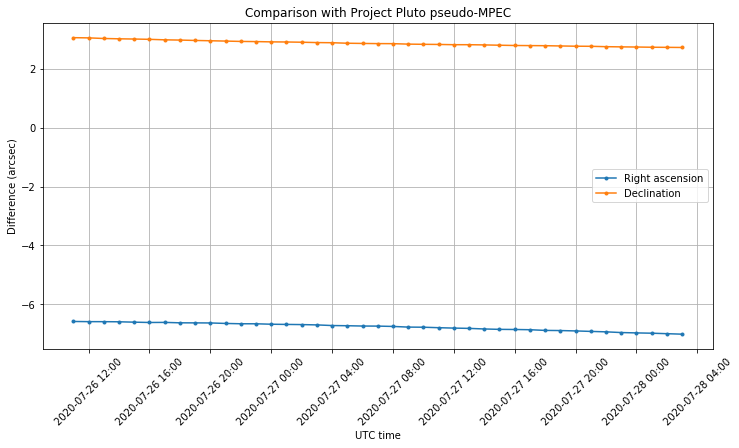

In [9]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(pluto_t[t_matches[:,0]].datetime,
         (pluto_ra[t_matches[:,0]] - radec_ra[t_matches[:,1]]).arcsec, '.-',
        label = 'Right ascension')
plt.plot(pluto_t[t_matches[:,0]].datetime,
         (pluto_dec[t_matches[:,0]] - radec_dec[t_matches[:,1]]).arcsec, '.-',
        label = 'Declination')
plt.grid()
plt.title('Comparison with Project Pluto pseudo-MPEC')
plt.ylabel('Difference (arcsec)')
plt.xlabel('UTC time')
date_fmt = DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation = 45)
plt.legend();